### Content

- Data Exploration
- Data Pre-Processing
- Data Visualization
- Vectorization and Splitting the data
- Model evaluating function

In [1]:
#%pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import re
import string

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from textblob import TextBlob, Word

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf


import warnings
warnings.filterwarnings('ignore')

In [3]:
# import chardet
# with open('sentiment140.csv', 'rb') as rawdata:
#     result = chardet.detect(rawdata.read(100000))
# result

# 1. Data Exploration

In [4]:
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv('sentiment140.csv', encoding='latin1', names=cols)

In [5]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   sentiment     1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   query_string  1600000 non-null  object
 4   user          1600000 non-null  object
 5   text          1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


From these info we can already see that the data has no missing values.

There are some features that won't be relevant in our analysis. Let's focus on text(tweets) and sentiment.


In [7]:
df.drop(columns=['id', 'user', 'date', 'query_string'], axis=1, inplace=True)

In [8]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


#### Check Balance

<AxesSubplot:xlabel='sentiment', ylabel='count'>

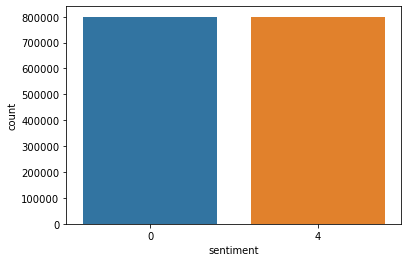

In [9]:
df['sentiment'].value_counts(normalize = True)
sns.countplot(df['sentiment'])

The data is balanced (# pos tweets = # neg tweets)

Edit the positive tweets label to be 1 .

In [10]:
df['sentiment'] = df['sentiment'].replace({4:1})

How long is the longest tweet?

In [11]:
df.tail(100)

,sentiment,text
1599900,1,@cris1015 My goal on stocks like $MTXX is to h...
1599901,1,@wolfpack40 That's what I'm thinking! Knock he...
1599902,1,@Jchawes yeah what about remotes for your car ...
1599903,1,Post your Le Mans 2009 pics: .. I didn't reall...
1599904,1,@say_my_name TRAITOR!!!! love you
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


In [12]:
max(df.text.str.len())

374

#### How many tweets > maximum length?
In November 2017, Twitter doubled the maximum allowed tweet length from 140 to 280 characters

In [13]:
sum(df.text.str.len()>280)
#len(df[(df.text.str.len()>280) == True])

18

In [14]:
df[df.text.str.len()>280]['text']

380539     @neospace à¹à¸£à¸·à¹à¸­à¸à¸à¸±à¹à¸à¸à¸£...
650945     human shield à®à®©à¯?à®± à®à¯à®±à¯?à®¤à¯à®...
709142     @chathuras à¶¶à¶½à·?à¶à·à¶± à·à¶»à· à¶ºà¶±...
1188208    à¤à¤¾à¤¨ à¤à¤¤à¤¾ à¥¨ à¤¦à¤¿à¤µà¤¸ à¤¸à¥?à¤...
1231574    @doax ì´ì°¨í¼ bandwidthë ë¶ì° íì?¼ ì...
1264121    @msathia à®®à¯?à®¹à¯à®®à¯?, à®ªà®¯à®®à¯?à®±à¯...
1277241    à¸à¸­à¸¥à¸±à¸¡à¸à¸´à¸ªà¸à¹à¸à¸£à¸ AE à¸...
1295281    @catfish_ohm à¹à¸à¹à¸²à¹à¸«à¹à¸?à¸²à¸£à¹...
1317520    @justinchronicle íë¦° ë§?ìì? ìëì­ë...
1319230     @laches [æçèª å¯¦å
­ååæ¶] æè¿è·ä...
1358216    @thanr à¹à¸à¸µà¹à¸¢à¸§à¹à¸­à¸²à¸£à¸²à¸à¸²...
1381863    @devilworks ì ì?ê²ë? ê·¸ë° ë¶ì?´ ê³ì­ë...
1397388    ê·¼ë?° ë¡ë°¥ì?´ìì¼ë ì±
ìì§ê³  ë ë¤...
1406970    â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥OMGGG! 9 DAYS...
1450935    @KaewGB à¸­à¹à¸­  à¹à¸à¸¢à¸à¸²à¸¡à¹à¹à¸...
1460047    @iReed ëë¶ë¶ì? ì°¬ì¬ë 'í°ì¹ì¤í¤'ì...
1484882    @iannnnn à¹à

In [15]:
df = df.drop(df[df.text.str.len()>280].index).reset_index(drop=True)

#### Word count distribution for both positive and negative 

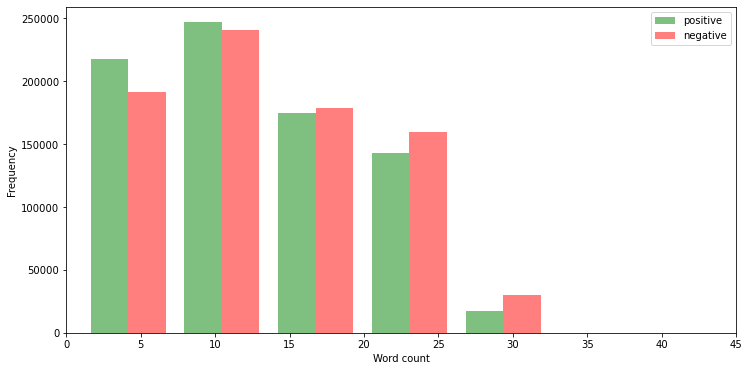

In [16]:
def word_count(words):
    return len(words.split())

df['word count'] = df['text'].apply(word_count)
p = df['word count'][df.sentiment == 1]
n = df['word count'][df.sentiment == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

#### Common words in training dataset

In [17]:
from collections import Counter
all_words = []
for line in list(df['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 518734),
 ('and', 295674),
 ('you', 237766),
 ('for', 214051),
 ('have', 143295),
 ('that', 128775),
 ("i'm", 127616),
 ('but', 124676),
 ('just', 124454),
 ('with', 113488),
 ('was', 102742),
 ('not', 102160),
 ('this', 88151),
 ('get', 80943),
 ('good', 77367),
 ('are', 75994),
 ('like', 75424),
 ('all', 74076),
 ('out', 68953),
 ('your', 64854)]

# 2. Preprocessing


- Lowercasing text
- Non useful text removal
- Punctuation removal
- Stop words removal
- Tokenisation
- Stemming


In [18]:
df.drop(columns=['word count'], axis=1, inplace=True)

##### Lowercasing text

In [19]:
df['text'] = df['text'].str.lower()

##### Non useful text removal:

In [20]:
df['text'] = df['text'].apply(lambda t: re.sub('@[^ ]+|#[^ ]+', '', t))

##### Punctuation removal:

In [21]:
#string.punctuation
df['text'] = df['text'].str.replace('[^A-Za-z0-9 ]', "")

##### Stop words removal:

In [22]:
stop = stopwords.words('english')
stop 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
#stop.append('im')

In [24]:
df['text'] = df['text'].apply(lambda t: " ".join(word for word in t.split() if word not in stop))

#### Tokenisation

In [25]:
df['text'] = df['text'].apply(TweetTokenizer().tokenize)

##### Stemming:

In [26]:
df['text'][:5]

0    [httptwitpiccom, 2y1zl, awww, thats, bummer, s...
1    [upset, cant, update, facebook, texting, might...
2    [dived, many, times, ball, managed, save, 50, ...
3              [whole, body, feels, itchy, like, fire]
4                       [behaving, im, mad, cant, see]
Name: text, dtype: object

In [27]:
st = PorterStemmer()
df['text'] = df['text'].apply(lambda t: " ".join([st.stem(word) for word in t]))

In [28]:
#df['text'] = df['text'].apply(lambda t: " ".join([Word(word).lemmatize() for word in t.split()]))

In [29]:
df.head()

,sentiment,text
0,0,httptwitpiccom 2y1zl awww that bummer shoulda ...
1,0,upset cant updat facebook text might cri resul...
2,0,dive mani time ball manag save 50 rest go bound
3,0,whole bodi feel itchi like fire
4,0,behav im mad cant see


### 3. Data Visualization

Let's looking at the summary of positive and negative tweets. I will visualize the data using word cloud.

In [31]:
neg_tweets = df.loc[df['sentiment']==0]
pos_tweets = df.loc[df['sentiment']==1]

Wordcloud fun's input needs to be a single string.

In [32]:
neg_string = neg_tweets['text'].str.cat(sep=' ')
pos_string = pos_tweets['text'].str.cat(sep=' ')

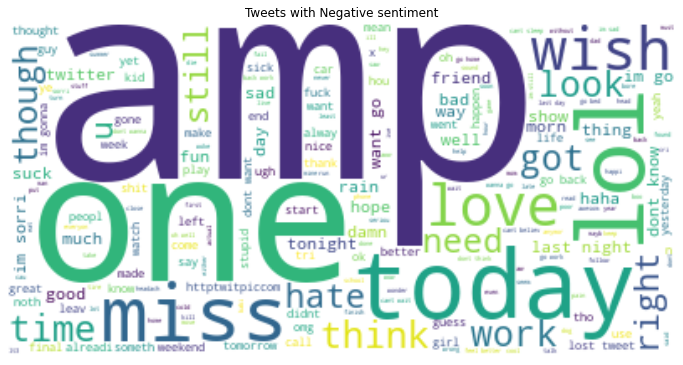

In [33]:
plt.figure(figsize=(12,10))
wordcloud_neg = WordCloud(max_font_size=200, background_color="white").generate(neg_string) 
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis('off')
plt.title("Tweets with Negative sentiment");

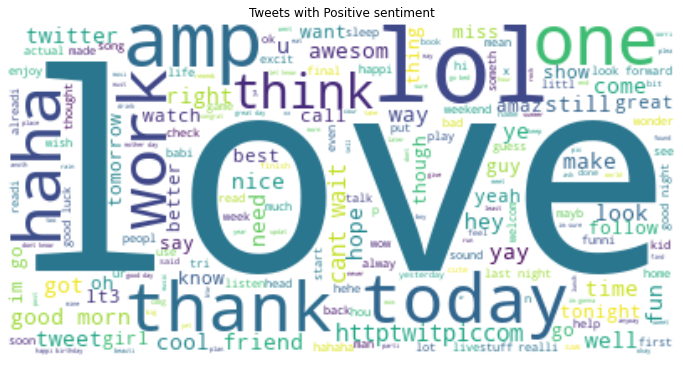

In [34]:
plt.figure(figsize=(12,10))
wordcloud_pos = WordCloud(max_font_size=200, background_color="white").generate(pos_string)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis('off')
plt.title("Tweets with Positive sentiment");

Data is cleaned and ready to do machine learning. 

In [35]:
df.head()

,sentiment,text
0,0,httptwitpiccom 2y1zl awww that bummer shoulda ...
1,0,upset cant updat facebook text might cri resul...
2,0,dive mani time ball manag save 50 rest go bound
3,0,whole bodi feel itchi like fire
4,0,behav im mad cant see


# 4. Vectorization and Splitting the data 

In [36]:
X = df['text'].values
y = df['sentiment'].values

In [37]:
print(X.shape)
print(y.shape)

(1599982,)
(1599982,)


### TF-IDF

In [38]:
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  441837


In [39]:
print(X.shape)
print(y.shape)

(1599982, 441837)
(1599982,)


### Split train and test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=7)

In [41]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1279985, 441837)
y_train (1279985,)

X_test (319997, 441837)
y_test (319997,)


# 5. Model Building

### Model evaluating function

In [42]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

#### Logistic Regression

Accuracy of model on training data : 80.31555057285827
Accuracy of model on testing data : 78.08104450979228 

              precision    recall  f1-score   support

           0       0.80      0.76      0.78    160409
           1       0.77      0.80      0.79    159588

    accuracy                           0.78    319997
   macro avg       0.78      0.78      0.78    319997
weighted avg       0.78      0.78      0.78    319997



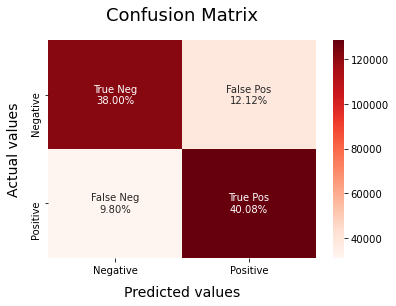

In [43]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

#### Linear SVM

Accuracy of model on training data : 84.16551756465897
Accuracy of model on testing data : 77.34853764254039 

              precision    recall  f1-score   support

           0       0.79      0.75      0.77    160409
           1       0.76      0.79      0.78    159588

    accuracy                           0.77    319997
   macro avg       0.77      0.77      0.77    319997
weighted avg       0.77      0.77      0.77    319997



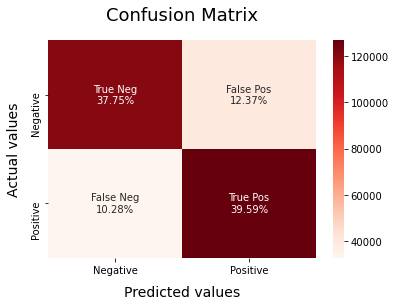

In [44]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

#### Naive Bayes

Accuracy of model on training data : 80.54133446876331
Accuracy of model on testing data : 76.97259661809329 

              precision    recall  f1-score   support

           0       0.77      0.77      0.77    160409
           1       0.77      0.77      0.77    159588

    accuracy                           0.77    319997
   macro avg       0.77      0.77      0.77    319997
weighted avg       0.77      0.77      0.77    319997



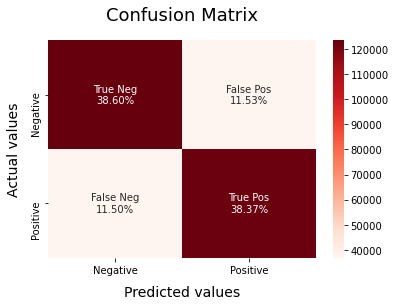

In [45]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

#### Random Forest

Accuracy of model on training data : 72.76194642905972
Accuracy of model on testing data : 71.22973027872136 

              precision    recall  f1-score   support

           0       0.75      0.64      0.69    160409
           1       0.68      0.79      0.73    159588

    accuracy                           0.71    319997
   macro avg       0.72      0.71      0.71    319997
weighted avg       0.72      0.71      0.71    319997



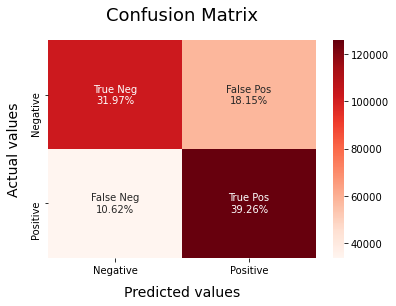

In [46]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

#### RNN

In [53]:
import keras
from keras.models import Sequential
from keras import layers
#from keras.layers import Dense, Embedding, LSTM, Dropout
#from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from keras import backend as K
from keras.callbacks import ModelCheckpoint
#from keras.utils.np_utils import to_categorical
from keras import regularizers


In [52]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.text)
sequences = tokenizer.texts_to_sequences(df.text)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  719 1673    4]
 [   0    0    0 ...   10  193 1069]
 [   0    0    0 ...  356    2 2815]
 ...
 [   0    0    0 ...  138  298 1534]
 [   0    0    0 ...  405 4359   11]
 [   0    0    0 ...    0    0   57]]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(tweets, df.sentiment.values, test_size=0.2, random_state=7)

In [55]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])



Epoch 1/10
40000/40000 [==============================] - ETA: 0s - loss: 0.4681 - accuracy: 0.7762
Epoch 1: val_accuracy improved from -inf to 0.78624, saving model to rnn_model.hdf5
40000/40000 [==============================] - 4146s 104ms/step - loss: 0.4681 - accuracy: 0.7762 - val_loss: 0.4510 - val_accuracy: 0.7862
Epoch 2/10
40000/40000 [==============================] - ETA: 0s - loss: 0.4484 - accuracy: 0.7890
Epoch 2: val_accuracy improved from 0.78624 to 0.79045, saving model to rnn_model.hdf5
40000/40000 [==============================] - 4294s 107ms/step - loss: 0.4484 - accuracy: 0.7890 - val_loss: 0.4469 - val_accuracy: 0.7905
Epoch 3/10
40000/40000 [==============================] - ETA: 0s - loss: 0.4424 - accuracy: 0.7925
Epoch 3: val_accuracy improved from 0.79045 to 0.79074, saving model to rnn_model.hdf5
40000/40000 [==============================] - 6531s 163ms/step - loss: 0.4424 - accuracy: 0.7925 - val_loss: 0.4460 - val_accuracy: 0.7907
Epoch 4/10
40000/40000

In [56]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')
# print(pred)

Negative
